# **Context Engineering with [Pixeltable](https://pixeltable.com)**

# LLM Setup

This section initializes the OpenAI API key required for LLM used in the context engineering demo. The code securely handles API key management.

In [ ]:
import os
import getpass
# Check if the OPENAI_API_KEY environment variable is set
if 'OPENAI_API_KEY' not in os.environ:
    # If not set, prompt the user to enter their securely
    os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

# Core Libraries:
- **[pixeltable](https://docs.pixeltable.com)**: The main framework for managing multimodal data and AI workflows
- **[pixelagent](https://github.com/pixeltable/pixelagent)**: Agent framework for building AI assistants with tool capabilities

# RAG - Document Search

This section demonstrates **Retrieval Augmented Generation (RAG)**, a powerful technique that combines the generative capabilities of large language models with external knowledge retrieval.

In [68]:
import pixeltable as pxt
from pixeltable.iterators import DocumentSplitter
from pixeltable.functions.huggingface import sentence_transformer

# Drop the existing directory and create a new one for context engineering
pxt.drop_dir("context_engineering", if_not_exists="ignore", force=True)
pxt.create_dir("context_engineering")

# Create a Pixeltable table named "documents" with a Document column for PDFs
documents_t = pxt.create_table(
    "context_engineering.documents",
    {"pdf": pxt.Document}
)
# Create a Pixeltable view named "document_chunks" from the "documents" table
# Use DocumentSplitter to break down documents into chunks based on token limit
documents_chunks = pxt.create_view(
    "context_engineering.document_chunks",
    documents_t,
    iterator=DocumentSplitter.create(
        document=documents_t.pdf,
        separators="token_limit",
        limit=300
    )
)

# Define the embedding model to be used for text embedding
embed_model = sentence_transformer.using(model_id="intfloat/e5-large-v2")
# Add an embedding index to the "text" column of the document_chunks view using the defined embedding model
documents_chunks.add_embedding_index(column="text", string_embed=embed_model)

Created directory 'context_engineering'.
Created table 'documents'.


## Document Ingestion

This section demonstrates the process of loading financial documents into our RAG system. The documents serve as the knowledge base that the AI agent will query to answer user questions.

In [69]:
# Get existing Pixeltable tables for documents and document chunks
documents_t = pxt.get_table("context_engineering.documents")
documents_chunks = pxt.get_table("context_engineering.document_chunks")

# Base URL for the documents
DOCUMENT_URL = ("https://github.com/pixeltable/pixeltable/raw/release/docs/resources/rag-demo/")

# List of document filenames
document_urls = [
    DOCUMENT_URL + doc for doc in [
        "Argus-Market-Digest-June-2024.pdf",
        "Company-Research-Alphabet.pdf",
        # "Zacks-Nvidia-Report.pdf", # Commented out to exclude this document
    ]
]
# Insert the document URLs into the documents table
documents_t.insert({"pdf": url} for url in document_urls)

Inserting rows into `documents`: 2 rows [00:00, 212.09 rows/s]
Inserting rows into `document_chunks`: 34 rows [00:00, 552.73 rows/s]
Inserted 36 rows with 0 errors.


36 rows inserted, 4 values computed.

pos,text,pdf
19,"other customers. However, clients and prospective clients should note that Argus Investors' Counsel and Argus Research Co., as units of The Argus Research Group, have certain employees in common, including those with both research and portfolio management responsibilities, and that Argus Research Co. employees participate in the management and marketing of the AIC core equity strategy and UIT and model portfolio products. Recipients of the Research reports in Singapore should contact the In ...... res Act, the Intermediary accepts legal responsibility for the contents of Research Reports in respect of such recipient in accordance with applicable law. When reports are distributed by Intermediaries in Singapore, the Intermediary, and not Argus Research, is solely responsible for ensuring that the recipients of the Research Reports understand the information contained in the Research Reports and that such information is suitable based on the customer's profile and investment objectives.",
18,"this report constitutes individual investment, legal or tax advice. Argus may issue or may have issued other reports that are inconsistent with or may reach different conclusions than those represented in this report, and all opinions are reflective of judgments made on the original date of publication. Argus is under no obligation to ensure that other reports are brought to the attention of any recipient of this report. Argus shall accept no liability for any loss arising from the use of t ...... iates may serve as officers or directors of covered companies, or may own more than one percent of a covered company's stock. Argus Investors' Counsel (AIC), a portfolio management business based in Stamford, Connecticut, is a customer of Argus Research Co. (ARC), based in New York. Argus Investors' Counsel pays Argus Research Co. for research used in the management of the AIC core equity strategy and model portfolio and UIT products, and has the same access to Argus Research Co. reports as",
17,"is registered with the U.S. Securities and Exchange Commission. Argus Investors' Counsel is a subsidiary of The Argus Research Group, Inc. Neither The Argus Research Group nor any affiliate is a member of the FINRA or the SIPC. Argus Research is not a registered broker dealer and does not have investment banking operations. The Argus trademark, service mark and logo are the intellectual property of The Argus Research Group, Inc. The information contained in this research report is produced a ...... not an offer to sell or a solicitation of an offer to buy any security. The information and material presented in this report are for general information only and do not specifically address individual investment objectives, financial situations or the particular needs of any specific person who may receive this report. Investing in any security or investment strategies discussed may not be suitable for you and it is recommended that you consult an independent investment advisor. Nothing in",
16,"premium relative P/E in the 1.5- to 1.7-times range based on strong revenue and rising new orders, strong cash-growth trends, market-share gains, and increasing profitability. On all measures of historical comparable valuation, we calculate a value in the \$340s, in a stable trend. Peer comparable analysis values Accenture in the \$250s, in a slightly declining trend. Accenture trades at shrinking premiums to peers on P/E and price/book, and at a discount on price/sales; we believe that Accen ...... , in a stable trend and above current prices. Appreciation to our 12-month target price of \$380 implies a risk-adjusted total return, including the 1.7% dividend yield, in excess of our forecast for S&P 500 capital appreciation. On that basis, we are reiterating our BUY rating. On June 20, BUY-rated ACN closed at \$306.16, up \$20.81. (Jim Kelleher, CFA, 6/20/24) Argus Research Co. (ARC) is an independent investment research provider whose parent company, A
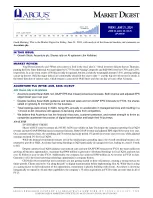
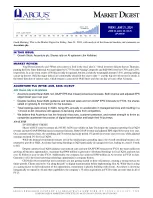
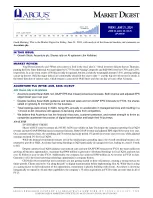
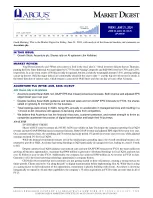
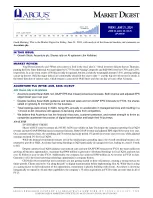
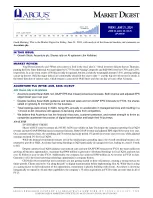
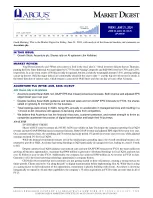
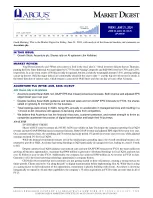
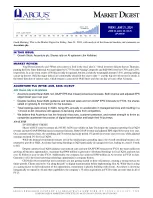
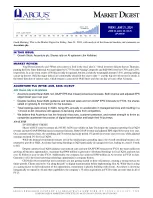
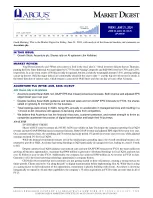
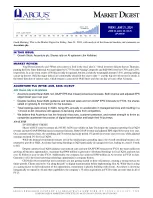
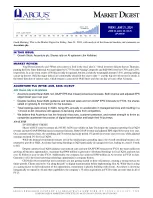
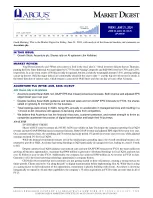
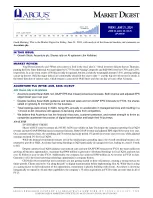
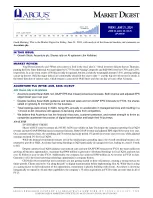
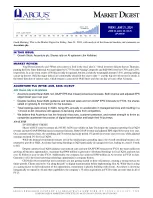
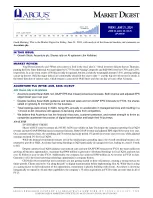
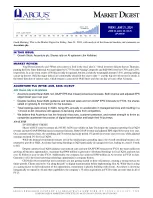
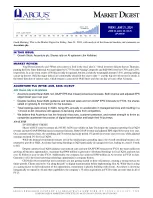
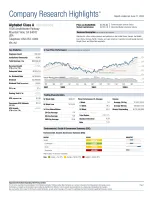
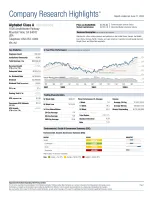
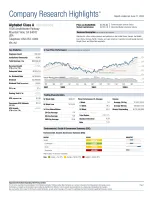
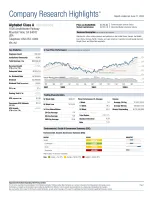
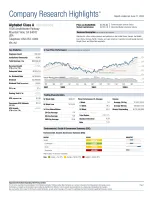
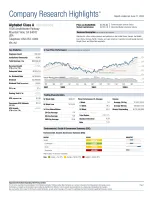
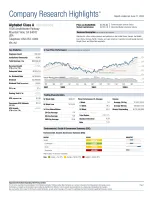
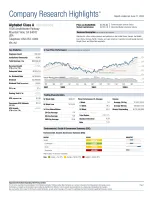
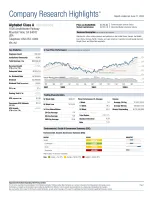
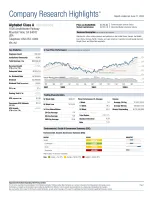
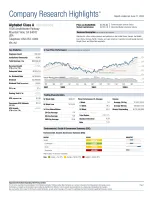
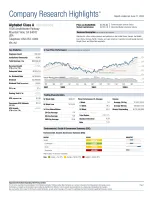
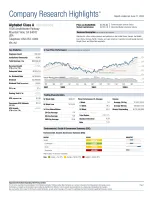
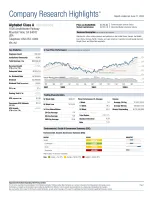

In [70]:
documents_chunks.collect()

## Tools

This section defines custom tools that extend the AI agent's capabilities beyond text generation. These tools demonstrate how to create specialized functions for specific domains and use cases.

In [71]:
@pxt.query
def find_documents(query: str) -> dict:
    """Function to return top five chunks from financial documents that are most similar to query, ranked by vector similarity for use of RAG."""
    # Calculate the similarity between the query and the text of the document chunks using the 'similarity' function
    sim = documents_chunks.text.similarity(query)
    # Order the document chunks by similarity in descending order, select the text and similarity score, and limit to the top 5 results
    return (
        documents_chunks.order_by(sim, asc=False)
        .select(
            documents_chunks.text,
            similarity=sim
        )
        .limit(5)
    )

MCP allows to use of tools exposed by the MCP server and integrates external services and custom logic into agentic workflows. Tools exposed by the MCP server can be used as Pixeltable UDFs.

In [ ]:
# Connect to the Alpha Vantage stock market MCP server. 
# For an API key, visit https://www.alphavantage.co/support/#api-key
# This returns a list of UDFs, one for each tool.

api_key = "<api-key>"  # TODO: Replace <api-key> with your actual Alpha Vantage API key.
udfs = pxt.mcp_udfs(f"https://mcp.alphavantage.co/mcp?apikey={api_key}")

# Get available tools with: print(list(enumerate(udfs)))
get_exchange_rate = udfs[30]

## Agent

This section creates an intelligent AI agent that combines conversational capabilities with specialized tools. The agent represents the core orchestrator of our context engineering system.

In [73]:
from pixelagent.openai import Agent

# Define and initialize the Agent
tools_agent = Agent(
    name = "context_engineering.agent", # Name of the agent
    system_prompt=(
        "You are a tools-enabled AI assistant. "
        "Use `find_documents` for RAG/PDF-Search to retrieve the top-5 chunks as per user query and answer ONLY from those. "
        "If context is insufficient, say so explicitly. "
        "Use `get_exchange_rate` for realtime exchange rate for any pair of cryptocurrency (e.g., Bitcoin) or physical currency (e.g., USD). "
        "Be concise, factual, and avoid recursive tool calls."
    ),
    tools=pxt.tools(find_documents, get_exchange_rate), # Register the tools the agent can use
    reset=False, # Do not reset the agent's memory on initialization
    n_latest_messages=None # Keep all messages in memory
)

Created directory 'context_engineering.agent'.
Created table 'memory'.
Created table 'agent'.
Created table 'tools'.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.


## Tool Calling

This section demonstrates the agent in action, showcasing how it intelligently selects and uses appropriate tools based on the query content.

In [74]:
# Call the agent with a query to get a response using its defined tools.
print(tools_agent.tool_call("Give me a brief summary about Alphabet earnings."))

Inserting rows into `memory`: 1 rows [00:00, 205.36 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `tools`: 1 rows [00:00, 156.07 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `memory`: 1 rows [00:00, 356.33 rows/s]
Inserted 1 row with 0 errors.
In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of $1.89 per share, exceeding both the First Call Consensus estimate of $1.515 and the StarMine SmartEstimate of $1.533. The company's stock was priced at $176.30 on June 20, 2024, with a market capitalization of approximately $2.18 trillion. Alphabet operates through three main segments: Google Services, Google Cloud, and Other Bets, with total revenue for the trailing twelve months (TTM) at $80.54 billion. The company has shown a revenue growth of 11.8% compared to the prior TTM, and its institutional ownership stands at 80.9%. The next earnings report is expected on July 23, 2024.


In [ ]:
# Call the agent with a query to get the exchange rate between USD and BTC
print(tools_agent.tool_call("What is the exchange rate between USD and bitcoin?"))

Inserting rows into `memory`: 1 rows [00:00, 297.66 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `tools`: 1 rows [00:00, 288.47 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `memory`: 1 rows [00:00, 327.86 rows/s]
Inserted 1 row with 0 errors.
The exchange rate between Bitcoin (BTC) and the United States Dollar (USD) is approximately 91,420.56 USD for 1 BTC. Please note that this exchange rate is subject to change due to market fluctuations.


# Memory Management

## Short-term Memory

This section explores the sophisticated memory system that enables the agent to maintain context across conversations and learn from interactions over time. The memory system operates on multiple levels to provide comprehensive context engineering.

In [76]:
# Get the memory table associated with the agent.
memory = pxt.get_table("context_engineering.agent.memory")
# Collect all data from the memory table.
memory.collect()

message_id,role,content,timestamp
133bdf1e-937a-40e2-9626-7356939b1545,user,Give me a brief summary about Alphabet earnings.,2025-11-19 11:53:39.900677+00:00
d55a8f7b-bb75-4b1a-88b4-95c9ac284803,assistant,"In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of \$1.89 per share, exceeding both the First Call Consensus estimate of \$1.515 and the StarMine SmartEstimate of \$1.533. The company's stock was priced at \$176.30 on June 20, 2024, with a market capitalization of approximately \$2.18 trillion. Alphabet operates through three main segments: Google Services, Google Cloud, and Other Bets, with total revenue for the trailing twelve months (TTM) at \$80.54 billion. The company has shown a revenue growth of 11.8% compared to the prior TTM, and its institutional ownership stands at 80.9%. The next earnings report is expected on July 23, 2024.",2025-11-19 11:53:46.460504+00:00
c4085f9d-22d2-4f8b-a6a0-546077c8532e,user,What is the exchange rate between USD and bitcoin?,2025-11-19 11:54:21.028021+00:00
a1b0298f-cbda-48a2-bd65-61f1abc4a12c,assistant,"The exchange rate between Bitcoin (BTC) and the United States Dollar (USD) is approximately 91,420.56 USD for 1 BTC. Please note that this exchange rate is subject to change due to market fluctuations.",2025-11-19 11:54:24.669192+00:00


In [77]:
# Initialize an empty string to store the chat history
chat_history = ""
# Get the memory table from the Pixeltable database
memory = pxt.get_table("context_engineering.agent.memory")

# Collect the 'role' and 'content' columns from the memory table into a pandas DataFrame
df = memory.select(memory.role, memory.content).collect()
# Iterate through the DataFrame rows and format the chat history
for role, content in zip(df["role"], df["content"]):
    chat_history += f"{role}: {content}\n"

# Print the formatted chat history
print(chat_history)

user: Give me a brief summary about Alphabet earnings.
assistant: In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of $1.89 per share, exceeding both the First Call Consensus estimate of $1.515 and the StarMine SmartEstimate of $1.533. The company's stock was priced at $176.30 on June 20, 2024, with a market capitalization of approximately $2.18 trillion. Alphabet operates through three main segments: Google Services, Google Cloud, and Other Bets, with total revenue for the trailing twelve months (TTM) at $80.54 billion. The company has shown a revenue growth of 11.8% compared to the prior TTM, and its institutional ownership stands at 80.9%. The next earnings report is expected on July 23, 2024.
user: What is the exchange rate between USD and bitcoin?
assistant: The exchange rate between Bitcoin (BTC) and the United States Dollar (USD) is approximately 91,420.56 USD for 1 BTC. Please note that this exchange rate is subject to change due to mar

## Long-term Memory

**Purpose**: Creates persistent, searchable memory that enables semantic retrieval of historical interactions.

In [78]:
import pixeltable.functions as pxtf
from pixeltable.functions import huggingface

# Get the memory table from the Pixeltable database
memory = pxt.get_table("context_engineering.agent.memory")

# Add a computed column 'user_content' to the memory table by formatting the 'role' and 'content' columns
memory.add_computed_column(
    user_content=pxtf.string.format(
        "{0}: {1}", memory.role, memory.content
    ),
    if_exists="ignore", # Ignore if the column already exists
)
# Add a computed column 'embedding' to the memory table by applying the sentence_transformer function to the 'user_content' column
memory.add_computed_column(
    embedding=huggingface.sentence_transformer(memory.user_content, model_id='intfloat/e5-large-v2')
)

# Add an embedding index to the 'user_content' column for faster similarity search
memory.add_embedding_index(
    column="user_content",
    idx_name="user_content_idx", # Name of the index
    embedding=embed_model, # Embedding model to use
    if_exists="ignore", # Ignore if the index already exists
)

Added 4 column values with 0 errors.
Added 4 column values with 0 errors.


In [79]:
# Get the memory table from the Pixeltable database
memory = pxt.get_table("context_engineering.agent.memory")
# Collect all data from the memory table into a pandas DataFrame
memory.collect()

message_id,role,content,timestamp,user_content,embedding
133bdf1e-937a-40e2-9626-7356939b1545,user,Give me a brief summary about Alphabet earnings.,2025-11-19 11:53:39.900677+00:00,user: Give me a brief summary about Alphabet earnings.,[ 0.038 -0.072 0.03 -0.009 -0.038 0.062 ... 0.003 -0.008 0.012 -0.018 0.039 0.013]
d55a8f7b-bb75-4b1a-88b4-95c9ac284803,assistant,"In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of \$1.89 per share, exceeding both the First Call Consensus estimate of \$1.515 and the StarMine SmartEstimate of \$1.533. The company's stock was priced at \$176.30 on June 20, 2024, with a market capitalization of approximately \$2.18 trillion. Alphabet operates through three main segments: Google Services, Google Cloud, and Other Bets, with total revenue for the trailing twelve months (TTM) at \$80.54 billion. The company has shown a revenue growth of 11.8% compared to the prior TTM, and its institutional ownership stands at 80.9%. The next earnings report is expected on July 23, 2024.",2025-11-19 11:53:46.460504+00:00,"assistant: In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of \$1.89 per share, exceeding both the First Call Consensus estimate of \$1.515 and the StarMine SmartEstimate of \$1.533. The company's stock was priced at \$176.30 on June 20, 2024, with a market capitalization of approximately \$2.18 trillion. Alphabet operates through three main segments: Google Services, Google Cloud, and Other Bets, with total revenue for the trailing twelve months (TTM) at \$80.54 billion. The company has shown a revenue growth of 11.8% compared to the prior TTM, and its institutional ownership stands at 80.9%. The next earnings report is expected on July 23, 2024.",[ 0. -0.055 0.017 -0.004 -0.04 0.065 ... 0.036 -0.009 0.005 -0.043 0.073 0.005]
c4085f9d-22d2-4f8b-a6a0-546077c8532e,user,What is the exchange rate between USD and bitcoin?,2025-11-19 11:54:21.028021+00:00,user: What is the exchange rate between USD and bitcoin?,[ 0.033 -0.073 0.035 -0.033 -0.068 0.046 ... -0.015 -0.032 0.044 -0.017 -0.025 0.023]
a1b0298f-cbda-48a2-bd65-61f1abc4a12c,assistant,"The exchange rate between Bitcoin (BTC) and the United States Dollar (USD) is approximately 91,420.56 USD for 1 BTC. Please note that this exchange rate is subject to change due to market fluctuations.",2025-11-19 11:54:24.669192+00:00,"assistant: The exchange rate between Bitcoin (BTC) and the United States Dollar (USD) is approximately 91,420.56 USD for 1 BTC. Please note that this exchange rate is subject to change due to market fluctuations.",[ 0.034 -0.048 0.016 -0.034 -0.082 0.049 ... -0. -0.028 0.032 -0.022 0.006 0.038]


### Integrate VectorDB

**Purpose**: Demonstrates integration with external vector databases for scalable memory management and advanced analytics.

In [80]:
from pathlib import Path

# Get the memory table from the Pixeltable database
memory = pxt.get_table("context_engineering.agent.memory")
# Collect all data from the memory table
memory.collect()

# Export selected columns (message_id, user_content, embedding) from the memory table
# to a LanceDB database located at 'vector_db' with a table named 'semantic_memory'.
# If the table exists, append the data.
pxt.io.export_lancedb(
    memory.select(memory.message_id, memory.user_content, memory.embedding),
    Path('vector_db'),
    'semantic_memory',
    if_exists='append'
)

In [ ]:
import lancedb

# Connect to the LanceDB database located at 'vector_db'
db = lancedb.connect('vector_db')
# Open the 'semantic_memory' table in the database and convert it to a pandas DataFrame
results = db.open_table('semantic_memory').to_pandas()
# Display the resulting DataFrame
results

,message_id,user_content,embedding
0,133bdf1e-937a-40e2-9626-7356939b1545,user: Give me a brief summary about Alphabet e...,"[0.038295243, -0.07218907, 0.029813364, -0.008..."
1,d55a8f7b-bb75-4b1a-88b4-95c9ac284803,assistant: In its recent earnings report for Q...,"[0.00032986247, -0.05505832, 0.016880741, -0.0..."
2,c4085f9d-22d2-4f8b-a6a0-546077c8532e,user: What is the exchange rate between USD an...,"[0.032953136, -0.073314324, 0.03461188, -0.032..."
3,a1b0298f-cbda-48a2-bd65-61f1abc4a12c,assistant: The exchange rate between Bitcoin (...,"[0.03403786, -0.048384063, 0.016288206, -0.034..."


### Vector Search

**Purpose**: Implements sophisticated semantic search capabilities for memory retrieval using advanced vector similarity techniques.

In [82]:
import lancedb
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

def search_memory(query: str) -> list[dict]:
    """Top-k search over LanceDB and return cosine similarity scores."""
    # Initialize the SentenceTransformer model for creating embeddings if it hasn't been already
    if not hasattr(search_memory, "_model"):
        search_memory._model = SentenceTransformer("intfloat/e5-large-v2")
    model = search_memory._model

    # Encode the query into a vector
    q = model.encode("query: " + query, normalize_embeddings=False).astype("float32")
    q_norm = np.linalg.norm(q) + 1e-12

    # Connect to the LanceDB database and open the table
    db = lancedb.connect('/content/vector_db')
    tbl = db.open_table('semantic_memory')

    # Perform a vector search using the encoded query and limit the results
    df = tbl.search(q, vector_column_name="embedding").limit(5).to_pandas()

    # Define a helper function to calculate cosine similarity
    def _cos(v):
        v = np.asarray(v, dtype="float32")
        return float(np.dot(v, q) / ((np.linalg.norm(v) + 1e-12) * q_norm))

    # Calculate cosine similarity for each result and add it as a new column
    df["cosine_similarity"] = [ _cos(v) for v in df["embedding"] ]
    # Sort the results by cosine similarity in descending order
    df = df.sort_values("cosine_similarity", ascending=False)

    # Return the results as a list of dictionaries
    return [
        {
            "message_id": row["message_id"],
            "user_content": row["user_content"],
            "cosine_similarity": float(row["cosine_similarity"]),
        }
        for _, row in df.iterrows()
    ]

In [83]:
# Call the search_memory function with a query and print the results
hits = search_memory("Give me the exchange rate of USD and BTC?")
hits

[{'message_id': 'c4085f9d-22d2-4f8b-a6a0-546077c8532e',
  'user_content': 'user: What is the exchange rate between USD and bitcoin?',
  'cosine_similarity': 0.9290766716003418},
 {'message_id': 'a1b0298f-cbda-48a2-bd65-61f1abc4a12c',
  'user_content': 'assistant: The exchange rate between Bitcoin (BTC) and the United States Dollar (USD) is approximately 91,420.56 USD for 1 BTC. Please note that this exchange rate is subject to change due to market fluctuations.',
  'cosine_similarity': 0.9078689217567444},
 {'message_id': '133bdf1e-937a-40e2-9626-7356939b1545',
  'user_content': 'user: Give me a brief summary about Alphabet earnings.',
  'cosine_similarity': 0.7917039394378662},
 {'message_id': 'd55a8f7b-bb75-4b1a-88b4-95c9ac284803',
  'user_content': "assistant: In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of $1.89 per share, exceeding both the First Call Consensus estimate of $1.515 and the StarMine SmartEstimate of $1.533. The company's 

# Response Generation

This section demonstrates the complete context engineering pipeline for generating intelligent, context-aware responses. It combines multiple sources of information to create comprehensive, accurate answers.

## Prepare Context

**Purpose**: Demonstrates the systematic assembly of comprehensive context from multiple information sources.

In [84]:
user_query = "Summarize my previous conversations with you!"

In [85]:
# Tool calling output
tool_ctx = tools_agent.tool_call(user_query)

Inserting rows into `memory`: 1 rows [00:00, 69.28 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `tools`: 1 rows [00:00, 305.82 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `memory`: 1 rows [00:00, 98.38 rows/s]
Inserted 1 row with 0 errors.


In [86]:
# Initialize an empty string to store the chat history
chat_history = ""
# Get the memory table from the Pixeltable database
memory = pxt.get_table("context_engineering.agent.memory")

# Collect the 'role' and 'content' columns from the memory table into a pandas DataFrame
df = memory.select(memory.role, memory.content).collect()
# Iterate through the DataFrame rows and format the chat history
for role, content in zip(df["role"], df["content"]):
    chat_history += f"{role}: {content}\n"

In [87]:
long_term_ctx = search_memory(user_query)

In [ ]:
# Prepare unified context
context_prompt = f"""
========================
USER QUERY
========================
{user_query}

========================
CONTEXT BLOCKS (read-only)
========================
[TOOL OUTPUT]
- May include:
  • RAG output: response that includes PDF/Document search
  • Exchange rate: exchange details between physical and crypto currency finance
{tool_ctx or "(none)"}

[USER CHAT HISTORY]
- Prefer recent messages if conflicting
- Messages are sorted means latest messages will be at the bottom
{chat_history or "(none)"}

[LONG-TERM USER DB HITS]
- Vector search results (highest cosine first)
- Only include items that look relevant to the query
{long_term_ctx or "(none)"}
"""
context_prompt

'\n========================\nUSER QUERY\n========================\nSummarize my previous conversations with you!\n\n========================\nCONTEXT BLOCKS (read-only)\n========================\n[TOOL OUTPUT]\n- May include:\n  • RAG output: response that includes PDF/Document search\n  • Weather: location, observation time, conditions\nIt seems there was no prior content in our conversation to summarize. If there is anything specific you\'d like to discuss or ask about, feel free to let me know!\n\n[USER CHAT HISTORY]\n- Prefer recent messages if conflicting\n- Messages are sorted means latest messages will be at the bottom\nuser: Give me a brief summary about Alphabet earnings.\nassistant: In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of $1.89 per share, exceeding both the First Call Consensus estimate of $1.515 and the StarMine SmartEstimate of $1.533. The company\'s stock was priced at $176.30 on June 20, 2024, with a market capitalizat

## Summarization

**Purpose**: Implements intelligent context compression to manage token budgets while preserving essential information for high-quality response generation.

In [89]:
from pixelagent.openai import Agent

# Define the system prompt for the summarizer agent
SUMMARIZER_SYSTEM_PROMPT = """
You are a compression assistant.
Condense the given block into a concise, lossless summary sized to the target.
Keep original identifiers, references. Remove redundancy, and off-topic lines.
Preserve key facts, numbers. Output only the summary text.
"""

# Initialize the summarizer agent with the defined system prompt
summarizer_agent = Agent(
    name="summarizer_agent",
    system_prompt=SUMMARIZER_SYSTEM_PROMPT
)

Created directory 'summarizer_agent'.
Created table 'memory'.
Created table 'agent'.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.


In [90]:
import tiktoken

# Get the cl100k_base encoding for token counting
_enc = tiktoken.get_encoding("cl100k_base")

# Function to count the number of tokens in a string
def count_tokens(s: str) -> int:
    return len(_enc.encode(s or ""))

# Function to check if a string is within the maximum token budget
def within_budget(s: str, max_tokens: int) -> bool:
    return count_tokens(s) <= max_tokens

In [91]:
def maybe_summarize_block(
    text: str,
    block_name: str,
    max_tokens: int,
    target_tokens: int | None = None,
    model: str = "gpt-4o-mini",
) -> str:
    """If `text` > max_tokens, compress to ~target_tokens (or ~max_tokens//2 if not given)."""
    # Clean and prepare the text
    text = (str(text) or "").strip()
    if not text or within_budget(text, max_tokens):
        return text

    # Determine the target token count for the summary
    tgt = target_tokens or max(256, max_tokens // 2)

    # Prepare the user message for the summarizer agent
    user_msg = (
        f"BLOCK NAME: {block_name}\n"
        f"TARGET SIZE: ~{tgt} tokens\n\n"
        f"CONTENT START\n{text}\nCONTENT END"
    )

    # Call the summarizer agent to get the summary
    resp = summarizer_agent.chat(messages=user_msg, model=model)
    return resp.choices[0].message.content.strip()

In [ ]:
def build_context_prompt_with_summarization(
    user_query: str,
    tool_ctx: str,
    chat_history: str,
    long_term_ctx: str,
    tool_budget: int = 1200,
    chat_budget: int = 900,
    mem_budget: int  = 900,
    model: str = "gpt-4o-mini",
) -> str:
    # Summarize each context block if it exceeds the token budget
    tool_ctx_s = maybe_summarize_block(tool_ctx, "TOOL OUTPUT", max_tokens=tool_budget, model=model)
    chat_hist_s = maybe_summarize_block(chat_history, "USER CHAT HISTORY", max_tokens=chat_budget, model=model)
    mem_ctx_s  = maybe_summarize_block(long_term_ctx, "LONG-TERM USER DB HITS", max_tokens=mem_budget, model=model)

    # Construct the final context prompt with the (potentially summarized) context blocks
    return f"""
========================
USER QUERY
========================
{user_query}

========================
CONTEXT BLOCKS (read-only)
========================
[TOOL OUTPUT]
- May include:
  • RAG output: response that includes PDF/Document search
  • Exchange rate: exchange details between physical and crypto currency finance
{tool_ctx_s or "(none)"}

[USER CHAT HISTORY]
- Prefer recent messages if conflicting
- Messages are sorted means latest messages will be at the bottom
{chat_hist_s or "(none)"}

[LONG-TERM USER DB HITS]
- Vector search results (highest cosine first)
- Only include items that look relevant to the query
{mem_ctx_s or "(none)"}
""".strip()

In [93]:
# Build the context prompt with summarization for each block
context_prompt = build_context_prompt_with_summarization(
    user_query=user_query,
    tool_ctx=tool_ctx,
    chat_history=chat_history,
    long_term_ctx=long_term_ctx,
)
context_prompt

'========================\nUSER QUERY\n========================\nSummarize my previous conversations with you!\n\n========================\nCONTEXT BLOCKS (read-only)\n========================\n[TOOL OUTPUT]\n- May include:\n  • RAG output: response that includes PDF/Document search\n  • Weather: location, observation time, conditions\nIt seems there was no prior content in our conversation to summarize. If there is anything specific you\'d like to discuss or ask about, feel free to let me know!\n\n[USER CHAT HISTORY]\n- Prefer recent messages if conflicting\n- Messages are sorted means latest messages will be at the bottom\nuser: Give me a brief summary about Alphabet earnings.\nassistant: In its recent earnings report for Q1 2024, Alphabet Inc. (NASDAQ: GOOGL) reported earnings of $1.89 per share, exceeding both the First Call Consensus estimate of $1.515 and the StarMine SmartEstimate of $1.533. The company\'s stock was priced at $176.30 on June 20, 2024, with a market capitalizatio

## Final Response Agent

**Purpose**: The culminating component that synthesizes all context sources into coherent, accurate, and helpful responses.

In [ ]:
from pixelagent.openai import Agent

SYSTEM_PROMPT = f"""
**1. Role & Objective**

You are a specialized AI assistant for context-based response generation. Your primary objective is to synthesize information from a given set of context blocks to answer a user's query directly and accurately.

**2. Core Workflow**

1.  **Analyze the Query:** Deconstruct the user's request to identify the specific information needed.
2.  **Review Context:** Scrutinize all provided context blocks: `[TOOL OUTPUT]`, `[USER CHAT HISTORY]`, and `[LONG-TERM USER DB HITS]`.
3.  **Synthesize Information:** Extract and combine only the relevant facts from the context to construct your answer.
4.  **Resolve Conflicts:** If the context blocks contain conflicting information, you **must** adhere to the following hierarchy of authority:
    1.  `[TOOL OUTPUT]` (Most definitive data for external tool calling either as RAG/Document search or stock market info for exchange details)
    2.  `[LONG-TERM USER DB HITS]` (Established user all chat session information till date stored in vector db retrieved as embedding similarity search)
    3.  `[USER CHAT HISTORY]` (Conversational chat context for current user session)
5.  **Handle Insufficiency:** If the combined context does not contain the necessary information to answer the query, answer the query with your existing knowledge.

**3. Strict Constraints**

* **No External Knowledge:** Your response must be derived *exclusively* from the provided context. Do not use any pre-existing knowledge.
* **No Speculation:** Do not infer information, fill in gaps, or make assumptions that are not explicitly stated in the context.

**4. Output Style**

* **Concise & Factual:** Deliver a short, direct answer to the user's query. Avoid conversational filler or unnecessary prose.
* **Actionable:** When the context supports it, frame the response in a way that helps the user complete a task or make a decision.
* **Neutral Tone:** Maintain an impartial, data-driven tone.
"""

# Initialize response agent
response_agent = Agent(
    name="response_generation",
    system_prompt=SYSTEM_PROMPT
)

Created directory 'response_generation'.
Created table 'memory'.
Created table 'agent'.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.


In [95]:
print(response_agent.chat(context_prompt))

Inserting rows into `memory`: 1 rows [00:00, 191.64 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `agent`: 1 rows [00:00, 195.72 rows/s]
Inserted 1 row with 0 errors.
Inserting rows into `memory`: 1 rows [00:00, 462.54 rows/s]
Inserted 1 row with 0 errors.
You previously inquired about two topics:

1. **Alphabet Earnings:** You asked for a summary of Alphabet's earnings, and I provided details about their Q1 2024 report, including earnings per share, stock price, market capitalization, revenue growth, and upcoming earnings report date.

2. **USD to Bitcoin Exchange Rate:** You requested the exchange rate between USD and Bitcoin. I informed you that 1 Bitcoin (BTC) is approximately 91,420.56 USD, noting that this rate is subject to market fluctuations.


# Conclusion

This comprehensive context engineering demo showcases a sophisticated AI system that combines multiple advanced technologies to create intelligent, context-aware responses. The implementation demonstrates how modern AI applications can move beyond simple query-response patterns to create truly adaptive, learning systems.